Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import scipy as sc
from itertools import chain
import sympy as sp
import numpy as np

def jordan(matrix):
    m = sp.Matrix(matrix)
    diag = m.is_diagonalizable()
    if(diag):
      eigs = sorted(m.eigenvects(), key=lambda x:x[0])
      eigs.reverse()
      P=[]
      P.append(list(chain.from_iterable(eigs[0][2])))
      P.append(list(chain.from_iterable(eigs[1][2])))
      P = [[P[0][0], P[1][0]],[P[0][1], P[1][1]]]
      #for tup in eigs:
      #  for v in tup[2]:
      #    P.append(list(v))
      J = [[0, 0], [0, 0]]
      eigvs = m.eigenvals()
      
      J[0][0] = list(eigvs.items())[0][0]
      J[1][1] = list(eigvs.items())[1][0]
          
    else:
      P=[]
      eigvs = m.eigenvals()
      J = [[list(eigvs.items())[0][0],1],[0,list(eigvs.items())[0][0]]]
      
      eigs = m.eigenvects()


      n = list(eigvs.items())[0][0] * sp.Matrix(np.eye(2))
      x = (m - n) ** 2

      nullspace = sc.linalg.null_space(np.array(x).astype(int))
      
      P=[]
      for tup in eigs:
        for v in tup[2]:
          P.append(list(v))
      n = list(eigvs.items())[0][0] * sp.Matrix(np.eye(2))
      m = (m - n) ** 2
      eigs = m.eigenvects()
      found = 0
      
      for tup in eigs:
        for v in tup[2]:
          if found:
            break
          if (list(v) not in nullspace):
            P.append(list(v))
            found = 1
      if found != 1:

        for tup in eigs:
          for v in tup[2]:
            x = list(v)
            P = [[P[0][0], x[0]], [P[0][1], x[1]]]
            P = np.array(P).astype(int)
            if not np.array_equal(np.matmul(np.matmul(P, J), np.linalg.inv(P)).astype(int), np.array(matrix).astype(int)):
              x[0] = x[0] * -1 
              P = [[P[0][0], x[0]], [P[0][1], x[1]]]

            break
    
    P = np.array(P).astype(int)
    J = np.array(J).astype(int) 

    return P, J


In [ ]:
A = [[1, 1], [1, 1]]
jordan(A)

(array([[ 1, -1],
        [ 1,  1]]),
 array([[2, 0],
        [0, 0]]))

In [ ]:
A = [[1, 1], [-1, -1]]
jordan(A)

(array([[-1, -1],
        [ 1,  0]]),
 array([[0, 1],
        [0, 0]]))

In [ ]:
A  = [[4, 1], [-1, 2]]
jordan(A)

(array([[-1, -1],
        [ 1,  0]]),
 array([[3, 1],
        [0, 3]]))

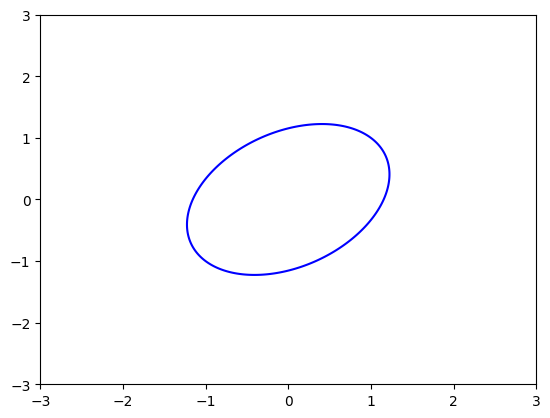

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ellipse(x, y):
    return 3*x**2 - 2*x*y + 3*y**2 - 4


x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
x_grid, y_grid = np.meshgrid(x, y)
z_grid = ellipse(x_grid, y_grid)

plt.contour(x_grid, y_grid, z_grid, levels=[0], colors='blue')
plt.show()

In [ ]:
#Yes I recognized the curve as an elipse

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def ellipse(u, v, t):
    x = u * np.cos(t) - v * np.sin(t)
    y = u * np.sin(t) + v * np.cos(t)
    return 3*x**2 - 2*x*y + 3*y**2 - 4


def plotRotation(t):
   

  u = np.linspace(-4, 4, 200)
  v = np.linspace(-4, 4, 200)

  u_grid, v_grid = np.meshgrid(u, v)
  z_grid = ellipse(u_grid, v_grid, t)

  plt.contour(u_grid, v_grid, z_grid, levels=[0], colors='blue')
  plt.show()


In the above function we use the ellipse function to find the rotated x and y values then use the ellipse equation to find the rest.

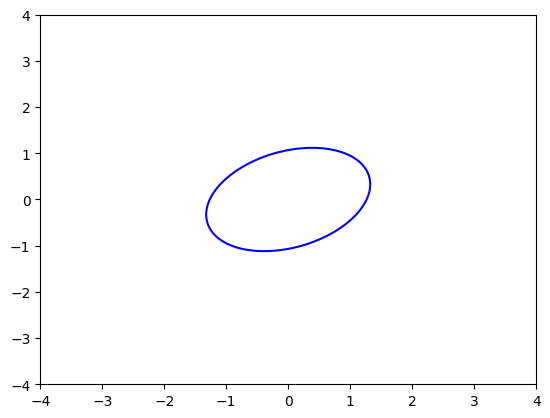

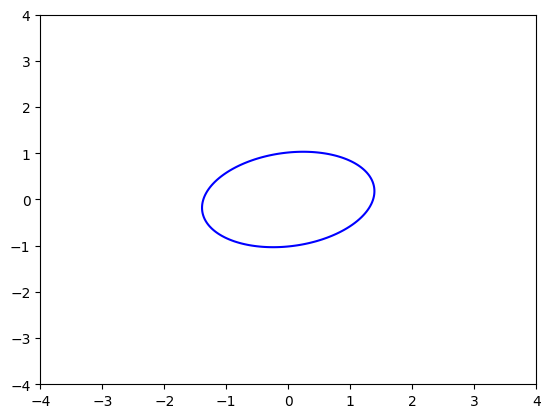

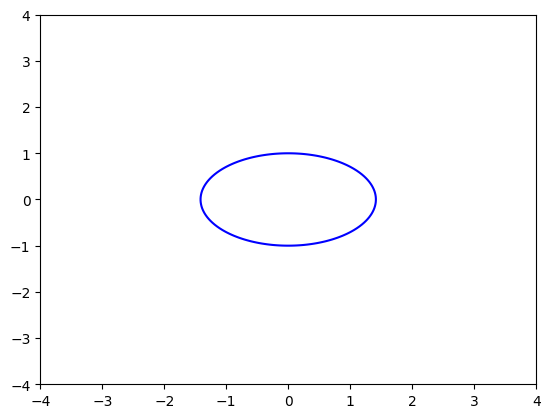

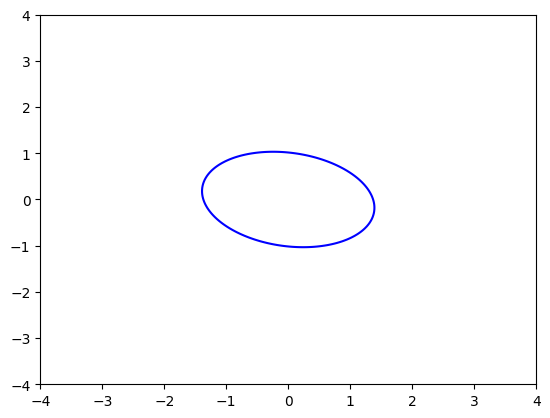

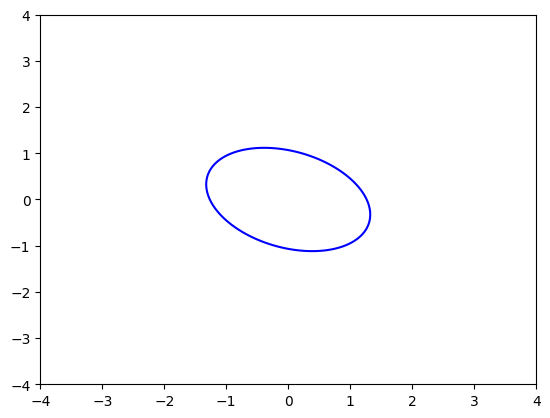

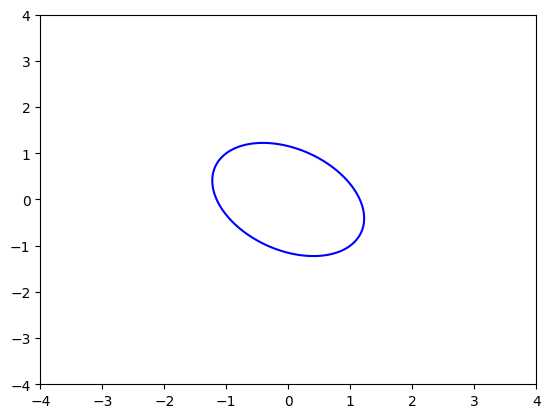

In [ ]:
x = np.pi/12
plotRotation(x)
x = np.pi/6
plotRotation(x)
x = np.pi/4
plotRotation(x)
x = np.pi/3
plotRotation(x)
x = (5 * np.pi)/12
plotRotation(x)
x = np.pi/2
plotRotation(x)

The angle pi/4 produces the rotated elipse with the axes being the x and the y axis. We cand find the equation of the ellipse by simply substituting x = u cos(π/4) - v sin(π/4) and y = u sin(π/4) + v cos(π/4) into the equation of the elipse, which is 3x^2 - 2xy + 3y^2 = 4. This gives us 2u^2 + 5v^2 = 4  which gives us u^2/2 + v^2/(4/5) = 1. Which is the equation of an ellipse with axes being the x and y axis. 

I know how we could find the correct angle to rotate an ellipse to standard form. First we'd find the center of the elipse and translate the ellipse so it is centered at the origin, which can be done rather trivialy. Then we'd have to diagonalize the matrix [[a,b],[b,c]] where a, b, and c are the terms associated with the equation of the elipse. Where a and c are the coefficients of the squared terms. This means we are finding a matrix P = [cos(t) -sin(t); sin(t) cos(t)] such that P^T M P is a diagonal matrix. Then, the angle t that solves tan(2t) = 2b / (a - c). Would give us a soluton.  